100%|██████████| 400/400 [06:34<00:00,  1.01it/s]


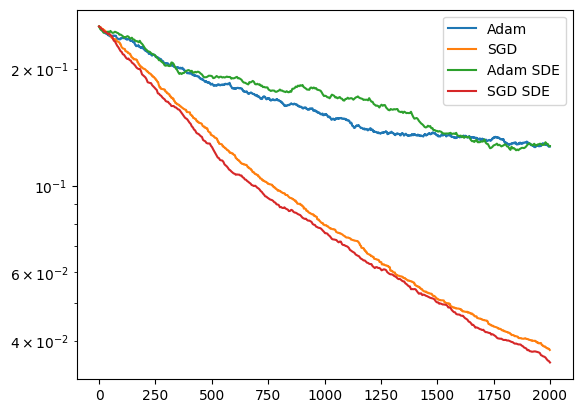

In [1]:
from optimizers import Adam, SGD
from sdes import AdamSDE, SgdSDE
from odes import AdamODE, SgdODE

import jax.numpy as jnp
from jax.numpy.linalg import norm

import matplotlib.pyplot as plt

# Setup the problem and parameters

problem_type = 'linreg' # from  'logreg' or 'linreg' or 'lip_phaseret' or 'real_phaseret'

d = 1000 # dimension
beta1 = 0 
beta2 = 0.2
T = 2 # time to run SDE for

lr = 1.2 # SDE learning rate
lrk = lr / d # Optimzer learning rate

# lr = lambda x: jnp.cos(2 * x / T) # SDE learning rate
# lrk = lambda x: jnp.cos(2 * x / T / d) / d # Optimizer learning rate

cov = jnp.linspace(0.1, 1.1, d) # initialize with diagonal covariance

params0 = jnp.linspace(2,0.1,d)
optimal_params = jnp.linspace(0.1,2,d)
params0 /= norm(params0)
optimal_params /= norm(optimal_params)


# Run the optimizers
adam = Adam(problem_type)
sgd = SGD(problem_type)

_, adam_risks = adam.run(params0, cov, T, lrk, optimal_params, beta1 = beta1, beta2 = beta2)
_, sgd_risks = sgd.run(params0, cov, T, lrk, optimal_params)

# Run the SDE equivalents
sgd_sde = SgdSDE(problem_type)
adam_sde = AdamSDE(problem_type)

params, sgd_sde_risks, times_s = sgd_sde.run(params0, optimal_params, cov, T, lr)
params, adam_sde_risks, times_s = adam_sde.run(params0, optimal_params, cov, T, lr, beta1 = beta1, beta2 = beta2)

# Run the ODE equivalents
adam_ode = AdamODE(problem_type)
sgd_ode = SgdODE(problem_type)

# sgd_risk, time, B = sgd_ode.run(params0, optimal_params, cov, T, lr, dt = 0.01)
# adam_risk, time, B = adam_ode.run(params0, optimal_params, cov, T, lr, dt = 0.01, beta1 = beta1, beta2 = beta2, eps = 0.001)

plt.yscale('log')
plt.plot(adam_risks, label = 'Adam')
plt.plot(sgd_risks, label = 'SGD')

plt.plot(times_s * d, adam_sde_risks, label = 'Adam SDE')
plt.plot(times_s * d, sgd_sde_risks, label = 'SGD SDE')

# plt.plot(time * d, adam_risk, label = 'Adam ODE')
# plt.plot(time * d, sgd_risk, label = 'SGD ODE')

plt.legend()
plt.show()

In [2]:
adam_risks

[Array(0.257649, dtype=float32),
 Array(0.2570806, dtype=float32),
 Array(0.25684813, dtype=float32),
 Array(0.25707057, dtype=float32),
 Array(0.25641945, dtype=float32),
 Array(0.25559747, dtype=float32),
 Array(0.25520846, dtype=float32),
 Array(0.25508398, dtype=float32),
 Array(0.25537172, dtype=float32),
 Array(0.2544319, dtype=float32),
 Array(0.25280896, dtype=float32),
 Array(0.2526907, dtype=float32),
 Array(0.25283664, dtype=float32),
 Array(0.25285122, dtype=float32),
 Array(0.2511294, dtype=float32),
 Array(0.25072688, dtype=float32),
 Array(0.25013968, dtype=float32),
 Array(0.25002587, dtype=float32),
 Array(0.2502918, dtype=float32),
 Array(0.250304, dtype=float32),
 Array(0.24990243, dtype=float32),
 Array(0.25036538, dtype=float32),
 Array(0.24969691, dtype=float32),
 Array(0.24931103, dtype=float32),
 Array(0.24802622, dtype=float32),
 Array(0.24803749, dtype=float32),
 Array(0.24796554, dtype=float32),
 Array(0.24751273, dtype=float32),
 Array(0.24751502, dtype=floa

In [3]:
adam_risk

NameError: name 'adam_risk' is not defined

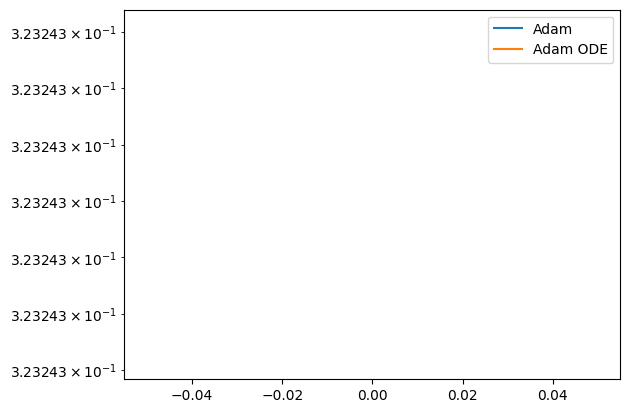

In [ ]:
plt.yscale('log')
plt.plot(adam_risks, label = 'Adam')
# plt.plot(sgd_risks, label = 'SGD')

# plt.plot(times_s * d, adam_sde_risks, label = 'Adam SDE')
# plt.plot(times_s * d, sgd_sde_risks, label = 'SGD SDE')

plt.plot(time * d, adam_risk, label = 'Adam ODE')
# plt.plot(time * d, sgd_risk, label = 'SGD ODE')

plt.legend()
plt.show()